In [2]:
import torch
import torchvision
from torchvision import datasets,transforms


In [3]:
trainset=torchvision.datasets.MNIST(root='./datasets',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

/home/udzi/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
testset=torchvision.datasets.MNIST(root='./datasets',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [6]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=10,shuffle=True,num_workers=2)

In [8]:
testloader=torch.utils.data.DataLoader(testset,batch_size=10,shuffle=False,num_workers=2)

In [9]:
trainset_shape=trainloader.dataset.train_data.shape
testset_shape=testloader.dataset.test_data.shape
print(trainset_shape,testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


/home/udzi/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/udzi/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [10]:
labels=('0','1','2','3','4','5','6','7','8','9')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
images_batch,labels_batch=iter(trainloader).next()

In [13]:
images_batch.shape

torch.Size([10, 1, 28, 28])

In [14]:
img=torchvision.utils.make_grid(images_batch)

In [15]:
img.shape

torch.Size([3, 62, 242])

In [16]:
np.transpose(img,(1,2,0)).shape

torch.Size([62, 242, 3])

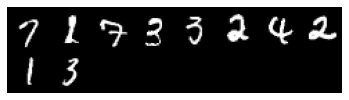

In [17]:
plt.imshow(np.transpose(img,(1,2,0)))
plt.axis('off')
plt.show()

In [18]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
class Net(nn.Module):   
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)
    # Defining the forward pass    
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        return F.log_softmax(x,dim=1)

In [24]:
net=Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
learning_rate=0.001
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=learning_rate)

In [28]:

num_epochs=20

In [34]:
for epoch in range(num_epochs):
    for i in trainloader:
        X,y=i
        net.zero_grad()
        output=net(X.view(-1,784))
        loss=criterion(output,y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.0301, grad_fn=<NllLossBackward>)
tensor(0.0054, grad_fn=<NllLossBackward>)
tensor(0.0001, grad_fn=<NllLossBackward>)
tensor(0.1817, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.0005, grad_fn=<NllLossBackward>)
tensor(0.0120, grad_fn=<NllLossBackward>)
tensor(4.9463e-05, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)
tensor(0.0001, grad_fn=<NllLossBackward>)
tensor(0.0801, grad_fn=<NllLossBackward>)
tensor(1.5473e-05, grad_fn=<NllLossBackward>)
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor(1.3709e-06, grad_fn=<NllLossBackward>)
tensor(0.0740, grad_fn=<NllLossBackward>)
tensor(0.0788, grad_fn=<NllLossBackward>)


In [56]:
net.eval()
with torch.no_grad():
    correct=0
    total=0
    for i in testloader:
        X,y=i
        output=net(X.view(-1,784))
        for a,b in enumerate(output):
            if torch.argmax(b)==y[a]:
                    total =total+1
                    correct =correct+1
    print("Accuracy of the model on test images :{}%".format(100*correct/total))

Accuracy of the model on test images :100.0%
